In [1]:
import pandas as pd
from scipy.spatial.distance import euclidean
import math


In [2]:
# read csv into dataframe
CURRENT_CELL = '8021'

df = pd.read_csv(f'../result_{CURRENT_CELL}/result_train.csv')

# update loss on cell if loss type is l1_loss
for index, row in df.iterrows():
    if row['CostFunc'] == 'l1_loss':
        df.at[index, 'AvgCost'] = row['AvgCost']**2

# sort dataframe based on AvgCost column in ascending order
df = df.sort_values(by='AvgCost')

# save updated dataframe as csv file
df.to_csv(f'{CURRENT_CELL}/result_sorted_loss.csv', index=False)

# print message indicating success
print(f'Updated dataframe saved to result_sorted_loss.csv for cell {CURRENT_CELL}')


Updated dataframe saved to result_sorted_loss.csv for cell 8021


In [3]:
def modified_euclidean_distance(x, y):
    distance = 0
    for i in range(0,len(x)):
        if x[i] == 0.0:
            x[i] = 1e-10
        if y[i] == 0.0:
            y[i] = 1e-10
        r = ((x[i] - y[i]) ** 2) * (max(x[i]/y[i], y[i]/x[i]) ** 2)
        distance += r

    
    return math.sqrt(distance)


def scientific_to_float(scientific_notation):
    parts = scientific_notation.split('e')
    if len(parts) == 1:
        return float(parts[0])
    else:
        a, b = parts[0], int(parts[1])
        if '.' in a:
            c = len(a) - a.index('.') - 1
            a = a.replace('.', '')
            b -= c
        if b < 0:
            return float(a) / (10 ** abs(b))
        else:
            return float(a) * (10 ** b)

In [4]:
import pandas as pd

SIZE = 10

# Load the original CSV
df = pd.read_csv(f'{CURRENT_CELL}/result_sorted_loss.csv')

# Create two dataframes based on the condition on AvgCost
good_runs = df.head(SIZE)
bad_runs = df.tail(len(df)-SIZE)  # or simply: bad_runs = df[10:]

# Save these dataframes to new CSV files
good_runs.to_csv(f'{CURRENT_CELL}/GoodRuns.csv', index=False)
bad_runs.to_csv(f'{CURRENT_CELL}/BadRuns.csv', index=False)


In [5]:

# read CSV file
df_good = pd.read_csv(f'{CURRENT_CELL}/GoodRuns.csv')
df_bad = pd.read_csv(f'{CURRENT_CELL}/BadRuns.csv')

# initialize a list of 8 zeros to store the sum for each parameter
param_sum_BestSol1 = [0] * 8

# iterate over each row in the BestSol1 column
for x in df_good['BestSol1']:
    # convert the scientific notation string to a list of floats
    params = list(map(scientific_to_float, x.strip('[]').split()))
    # add the values of each parameter to the running total
    for i in range(len(params)):
        param_sum_BestSol1[i] += params[i]

# divide each sum by the number of rows to get the mean
num_rows = len(df_good)
param_mean_good_BestSol1 = [x / num_rows for x in param_sum_BestSol1]


# initialize a list of 8 zeros to store the sum for each parameter
param_sum_BestSol1 = [0] * 8

# iterate over each row in the BestSol1 column
for x in df_bad['BestSol1']:
    # convert the scientific notation string to a list of floats
    params = list(map(scientific_to_float, x.strip('[]').split()))
    # add the values of each parameter to the running total
    for i in range(len(params)):
        param_sum_BestSol1[i] += params[i]

# divide each sum by the number of rows to get the mean
num_rows = len(df_bad)
param_mean_bad_BestSol1 = [x / num_rows for x in param_sum_BestSol1]


print(f"Mean Good Reuslts")
print(param_mean_good_BestSol1)
print()
print(f"Mean Bad Reuslts")
print(param_mean_bad_BestSol1)


Mean Good Reuslts
[0.004023535999, 32.04420624, 0.6275484347, 62.50970891000001, 0.09627598598, 0.01323072592, 55.470643264, 4.333671732]

Mean Bad Reuslts
[-0.0006281597762903437, 38.16938115293105, 0.41968699930831727, 68.16559942441383, 0.16275706944965515, 0.021605804685551736, 45.10388588090759, 4.261800514952587]


In [6]:
import pandas as pd
import numpy as np

# read CSV file
df_good = pd.read_csv(f'{CURRENT_CELL}/GoodRuns.csv')
df_bad = pd.read_csv(f'{CURRENT_CELL}/BadRuns.csv')

# initialize a list of 8 zeros to store the sum for each parameter
param_sum = [0] * 8
param_values = [[] for _ in range(8)]  # List to store values for calculating median

# iterate over each row in the five columns (BestSol1, BestSol2, BestSol3, BestSol4, BestSol5)
for col in ['BestSol1', 'BestSol2', 'BestSol3', 'BestSol4', 'BestSol5']:
    for x in df_good[col]:
        # convert the scientific notation string to a list of floats
        params = list(map(float, x.strip('[]').split()))
        # add the values of each parameter to the running total and store for calculating median
        for i in range(len(params)):
            param_sum[i] += params[i]
            param_values[i].append(params[i])

# divide each sum by the number of rows and the number of columns to get the mean
num_rows = len(df_good)
num_cols = 5
param_mean_good = [x / (num_rows * num_cols) for x in param_sum]

# calculate the median for each parameter
param_median_good = [np.median(values) for values in param_values]


# initialize a list of 8 zeros to store the sum for each parameter
param_sum = [0] * 8
param_values = [[] for _ in range(8)]  # List to store values for calculating median

# iterate over each row in the five columns (BestSol1, BestSol2, BestSol3, BestSol4, BestSol5)
for col in ['BestSol1', 'BestSol2', 'BestSol3', 'BestSol4', 'BestSol5']:
    for x in df_bad[col]:
        # convert the scientific notation string to a list of floats
        params = list(map(float, x.strip('[]').split()))
        # add the values of each parameter to the running total and store for calculating median
        for i in range(len(params)):
            param_sum[i] += params[i]
            param_values[i].append(params[i])

# divide each sum by the number of rows and the number of columns to get the mean
num_rows = len(df_bad)
num_cols = 5
param_mean_bad = [x / (num_rows * num_cols) for x in param_sum]

# calculate the median for each parameter
param_median_bad = [np.median(values) for values in param_values]

print(f"Mean Good Reuslts")
print(param_mean_good)
print(f"Median Good Reuslts")
print(param_median_good)
print()
print(f"Mean Bad Reuslts")
print(param_mean_bad)
print(f"Median Good Reuslts")
print(param_median_bad)
print()


Mean Good Reuslts
[0.004025713449000001, 32.21778081999999, 0.562251101754, 63.116627788, 0.09622727159799999, 0.013252433927999997, 55.110634645400005, 4.3454641478000005]
Median Good Reuslts
[0.004007715965, 32.224402350000005, 0.568306446, 61.65792065, 0.1024058135, 0.0130000157, 69.14224105, 4.252402855]

Mean Bad Reuslts
[-0.000795083797472689, 38.454656536013836, 0.41997087252384147, 67.95531489953096, 0.16294998274917233, 0.021703769349682808, 45.05866703635489, 4.2751099853799825]
Median Good Reuslts
[0.00328073193, 35.93470705, 0.4643692785, 71.0160413, 0.140599767, 0.0186580641, 35.103202249999995, 3.801657625]



In [7]:
import pandas as pd
import numpy as np

# Function to process the data
def process_data(file_name):
    # read CSV file
    df = pd.read_csv(file_name)

    # initialize empty NumPy arrays for each parameter
    param_arr = [np.empty(len(df)) for _ in range(8)]

    # iterate over each row in the five columns (BestSol1, BestSol2, BestSol3, BestSol4, BestSol5)
    for col in ['BestSol1', 'BestSol2', 'BestSol3', 'BestSol4', 'BestSol5']:
        for row_idx, x in enumerate(df[col]):
            # convert the scientific notation string to a list of floats
            params = list(map(float, x.strip('[]').split()))
            # assign each parameter to the corresponding NumPy array
            for i in range(8):
                param_arr[i][row_idx] = params[i]

    for i in range(len(param_arr)):
        param_arr[i] = np.copy(param_arr[i])
        param_arr[i] = np.delete(param_arr[i], np.where(param_arr[i] < 0))

    return param_arr

# process the data for both files
good_runs_param_arr = process_data(f'{CURRENT_CELL}/GoodRuns.csv')
bad_runs_param_arr = process_data(f'{CURRENT_CELL}/BadRuns.csv')

# Now good_runs_param_arr and bad_runs_param_arr each hold a list of 8 NumPy arrays,
# corresponding to the parameters for the good runs and bad runs respectively.



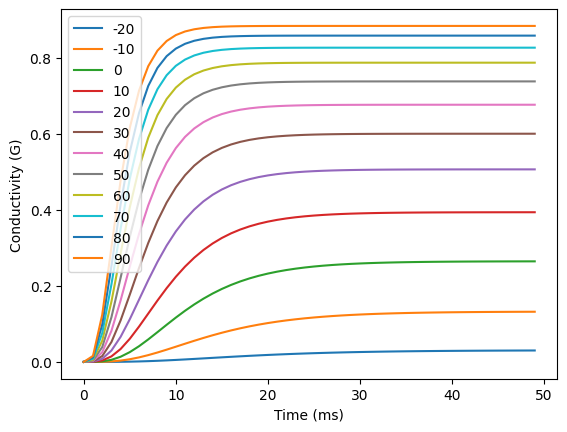

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C = param_mean_good

def alpha_n(V):
    result_alpha = (C[0] * (V + C[1])) / (1 - np.exp(-C[2] * (V + C[3])))
    return result_alpha

def beta_n(V):
    result_beta = C[4] * (np.exp(-C[5] * ( V + C[6] )))
    return result_beta

def n_inf(alpha, beta):
    result_n_inf =  alpha / (alpha + beta)
    return result_n_inf

def tau_n(alpha, beta):
    result_tau = 1 / (alpha + beta)
    return result_tau

def n_pow_4(n):
    result_n =  n ** C[7]
    return result_n
    
def get_y(t, V):
    alpha = alpha_n(V)
    beta = beta_n(V)
    n_inf_ = n_inf(alpha, beta)
    tau_n_ = tau_n(alpha, beta)
    n = n_inf_ * (1 - np.exp(-t/tau_n_))
    y_hat = n_pow_4(n) 
    return y_hat


dataset = []
n = 0
t_total = 50
VOLTS = np.arange(-20, 100, 10)
results = []

for V in VOLTS:
    voltage_results = []
    for t in np.arange(0, t_total):
        y = get_y(t, V)
        voltage_results.append(y)
        dataset.append((t, V, y))
    results.append(voltage_results)


graph_df = pd.DataFrame(results)
graph_df = graph_df.T
dataset_df = pd.DataFrame(dataset)
graph_df.plot()
plt.legend(np.arange(-20, 100, 10))
plt.xlabel("Time (ms)")
plt.ylabel("Conductivity (G)")
plt.show()

graph_df.to_csv(f'{CURRENT_CELL}/GeneratedDataBasedGAParams/graph_df_based_ga_params.csv', index=False)
dataset_df.to_csv(f'{CURRENT_CELL}/GeneratedDataBasedGAParams/dataset_based_ga_params.csv', index=False)


In [9]:
import pandas as pd
import numpy as np

def logcosh_loss(y_hat, y):
    return np.log(np.cosh(y_hat - y))

generated_df_based_params = pd.read_csv(f'{CURRENT_CELL}/GeneratedDataBasedGAParams/dataset_based_ga_params.csv')
test_df = pd.read_csv(f'{CURRENT_CELL}/DatasetTest/test.csv')

# Get the values in column 2 of generated_df_based_params and test_df
generated_values = generated_df_based_params.iloc[:, 2]
test_values = test_df.iloc[:, 2]

# Calculate the logcosh loss for each pair of values
loss_sum = 0
num_rows = len(generated_df_based_params)  # Assuming both dataframes have the same number of rows

for i in range(num_rows):
    loss = logcosh_loss(generated_values[i], test_values[i])
    loss_sum += loss

# Calculate the average loss
average_loss = loss_sum / num_rows

# Print the average loss
print("Average Logcosh Loss: ", average_loss)


Average Logcosh Loss:  0.001373371734378508


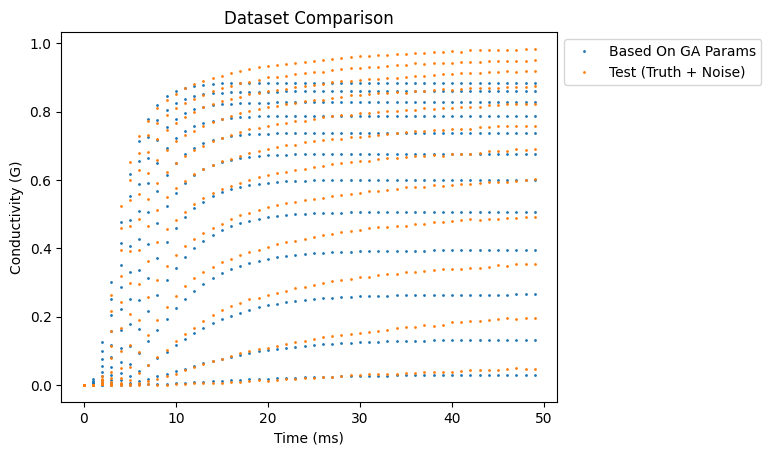

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the two dataframes
df1 = pd.read_csv(f'{CURRENT_CELL}/GeneratedDataBasedGAParams/dataset_based_ga_params.csv', header=None)
df1 = df1.drop(df1.index[0])
df2 = pd.read_csv(f'{CURRENT_CELL}/DatasetTest/test.csv', header=None)
df2 = df2.drop(df2.index[0])

df1.columns = ['Time', 'Temp', 'Value']
df2.columns = ['Time', 'Temp', 'Value']

# Convert 'Time' and 'Value' to numeric types
df1['Time'] = pd.to_numeric(df1['Time'])
df1['Value'] = pd.to_numeric(df1['Value'])
df2['Time'] = pd.to_numeric(df2['Time'])
df2['Value'] = pd.to_numeric(df2['Value'])

# Plot df1 with smaller markers
plt.plot(df1['Time'], df1['Value'], 'o', label='Based On GA Params', markersize=1)

# Plot df2 with smaller markers
plt.plot(df2['Time'], df2['Value'], 'o', label='Test (Truth + Noise)', markersize=1)

# Add title and labels
plt.title('Dataset Comparison')
plt.xlabel('Time (ms)')
plt.ylabel('Conductivity (G)')

# Adjust the legend position outside the plot and to the right side
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


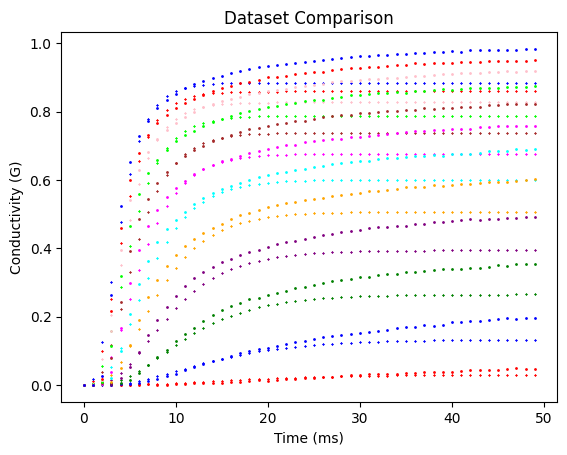

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the colors you want to use
colors = ["red", "blue", "green", "purple", "orange", "cyan", "magenta", "brown", "lime", "pink"]

# Read the two dataframes
based_generated = pd.read_csv(f'{CURRENT_CELL}/GeneratedDataBasedGAParams/dataset_based_ga_params.csv', header=None)
based_generated = based_generated.drop(based_generated.index[0])
Test_df = pd.read_csv(f'{CURRENT_CELL}/DatasetTest/test.csv', header=None)
Test_df = Test_df.drop(Test_df.index[0])

based_generated.columns = ['Time', 'Temp', 'Value']
Test_df.columns = ['Time', 'Temp', 'Value']

# Convert 'Time', 'Temp' and 'Value' to numeric types
based_generated['Time'] = pd.to_numeric(based_generated['Time'])
based_generated['Temp'] = pd.to_numeric(based_generated['Temp'])
based_generated['Value'] = pd.to_numeric(based_generated['Value'])
Test_df['Time'] = pd.to_numeric(Test_df['Time'])
Test_df['Temp'] = pd.to_numeric(Test_df['Temp'])
Test_df['Value'] = pd.to_numeric(Test_df['Value'])

# Create a dictionary mapping Temp values to colors (wrap around the color list if more Temp values than colors)
temp_values = sorted(based_generated["Temp"].unique())
temp_color = {temp: colors[i % len(colors)] for i, temp in enumerate(temp_values)}

# Plot df1 with smaller markers
for temp in based_generated['Temp'].unique():
    plt.plot(based_generated.loc[based_generated['Temp'] == temp, 'Time'], 
             based_generated.loc[based_generated['Temp'] == temp, 'Value'], 'x', 
             label=f'Based On GA Params, Temp={temp}', 
             color=temp_color[temp], markersize=1)

# Plot df2 with smaller markers
for temp in Test_df['Temp'].unique():
    plt.plot(Test_df.loc[Test_df['Temp'] == temp, 'Time'], 
             Test_df.loc[Test_df['Temp'] == temp, 'Value'], 'o', 
             label=f'Test (Truth + Noise), Temp={temp}', 
             color=temp_color[temp], markersize=1)

# Add title and labels
plt.title('Dataset Comparison')
plt.xlabel('Time (ms)')
plt.ylabel('Conductivity (G)')


# Show the plot
plt.show()
